In [0]:
#'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'

In [2]:
%matplotlib inline 
#plot without plt.show
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential, Model
from keras.layers import Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
from keras.layers.convolutional import Conv2D, MaxPooling2D
import random

Using TensorFlow backend.


In [3]:
# Print if GPU is used
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 17770465601862949608
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 18145641514748082740
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10577892717743168735
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11276946637
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1227935906655194260
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
np.random.seed(0)

In [5]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [6]:
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [0]:
# Print Error Code if isnot true
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

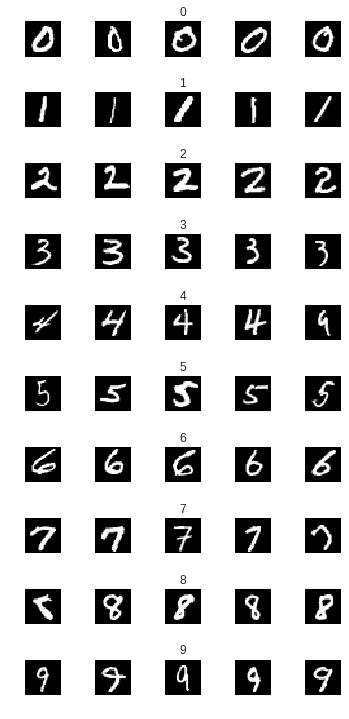

In [8]:
num_of_samples = []

cols = 5
num_classes = 10

fig, axs = plt.subplots(nrows=num_classes, ncols= cols, figsize=(5, 10))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected -1)), :, :], 
                         cmap=plt.get_cmap("gray"))
        axs[j][i].axis('off')
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

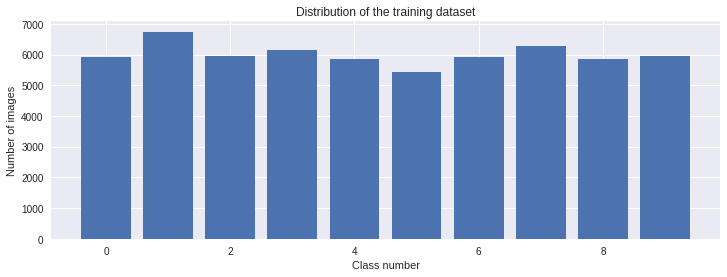

In [9]:
print(num_of_samples)
plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

In [0]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_test = X_test.reshape(10000, 28, 28, 1)

In [0]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [0]:
X_train = X_train/255
X_test = X_test/255

In [0]:
# Define the LeNet_model Function
def leNet_model():
  model = Sequential()
  model.add(Conv2D(30, (5,5), input_shape=(28,28,1), activation='relu')) # 30 Filters, 5x5 Kernel Size,... No Padding
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Conv2D(15, (3,3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2,2)))
  model.add(Flatten())
  model.add(Dense(500, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(num_classes, activation='softmax'))
  model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [14]:
model = leNet_model()
print(model.summary())

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 30)        780       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 30)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 15)        4065      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 15)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 375)               0         
_________________________________________________________________
dense_1 (Dense)      

In [15]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.1, batch_size=400, verbose=1, shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 5s 100us/step - loss: 0.2480 - acc: 0.9195 - val_loss: 0.0502 - val_acc: 0.9860
Epoch 2/10
54000/54000 [==============================] - 2s 41us/step - loss: 0.0716 - acc: 0.9776 - val_loss: 0.0401 - val_acc: 0.9890
Epoch 3/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0601 - acc: 0.9811 - val_loss: 0.0430 - val_acc: 0.9870
Epoch 4/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0510 - acc: 0.9837 - val_loss: 0.0397 - val_acc: 0.9880
Epoch 5/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0448 - acc: 0.9862 - val_loss: 0.0363 - val_acc: 0.9890
Epoch 6/10
54000/54000 [==============================] - 2s 40us/step - loss: 0.0417 - acc: 0.9871 - val_loss: 0.0339 - val_acc: 0.9903
Epoch 7/10
54000/54000 [==============================] - 2s 40us/step - loss: 0

Text(0.5, 0, 'epoch')

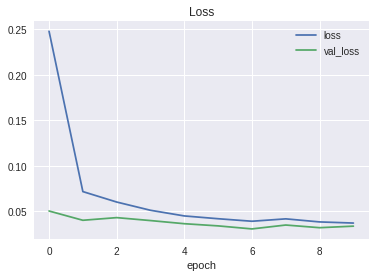

In [16]:
# Plotting Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

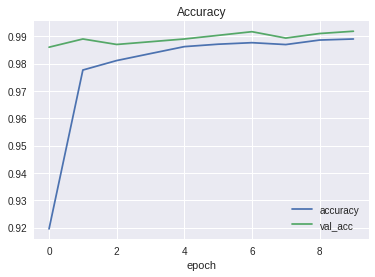

In [17]:
# Plotting Accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['accuracy', 'val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')

<Response [200]>


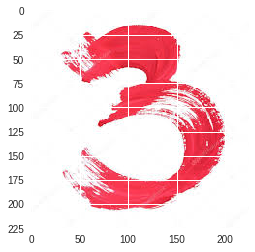

In [18]:
# Import Image from Internet
import requests
from PIL import Image
url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcST8KzXHtkSHcxzdpnllMhAj0upLEwnNFdtY6j4YUPcmaf4Ty3u'
response = requests.get(url, stream=True)
print(response) # 200 -> successful
img = Image.open(response.raw)
plt.imshow(img)

(28, 28, 3)
(28, 28)
[[  0   2   2   0   0   0   0   0   1   0   0   0   0   0   0   4   1   0
    0   0   0   0   1   0   0   0   0   0]
 [  2   1   1   0   0   0   0   1   0   1   0   0   3   4   5   2   1   0
    0   0   0   1   0   1   0   0   0   0]
 [  1   0   0   1   0   0   1   2   0   2  16 179 179 176 183 184 168   4
    0   0   1   0   0   0   1   0   0   1]
 [  0   0   0   0   1   2   3 172  10 187 175 178 179 176 177 180 182 181
    9   1   0   0   0   0   0   2   1   0]
 [  0   0   0   0   1   4  36  90 170 181 186 183 175 176 177 176 176 182
  179   2   0   0   0   0   0   0   1   0]
 [  1   0   0   5 172  17   2 154 172 157 178 189 182 182 179 182 171 183
  171   4   0   1   0   3   1   0   0   0]
 [  0   1   1   0  86 103  51  82 152 171 167 177 179 179 178 177 171 187
  175   1   0   0   3   1   0   0   0   0]
 [  1   0   1   0   7 164  75  60 161 170 178 123  18  97 198 187 180 171
  164   0   1   2   1   1   0   0   0   0]
 [  0   0   0   1   0   3  76 172 133 165  

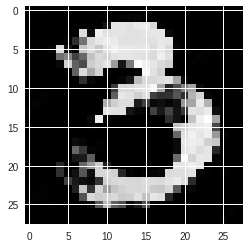

In [19]:
# Modifying image in Array
import cv2
img_array = np.asarray(img)
resized = cv2.resize(img_array, (28,28))
print(resized.shape)
# Convert to Grayscale
gray_scale = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
print(gray_scale.shape)
# Convert Image pixels 0 -> 255 and 255 -> 0
image = cv2.bitwise_not(gray_scale)
print(image)
plt.imshow(image, cmap=plt.get_cmap("gray"))

In [0]:
image = image/255
image = image.reshape(1, 28, 28, 1)
#print(image)

In [21]:
prediction = model.predict_classes(image)
print('Predicted digit:', str(prediction))

Predicted digit: [3]


In [22]:
# Evaluation
score = model.evaluate(X_test, y_test, verbose=0)
print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.030894547234791618
Test accuracy: 0.9914


In [23]:
# Get the outputs of the 2 Conv2D Layers
layer1 = Model(inputs=model.layers[0].input, output=model.layers[0].output) # Use first Layer in Network -> first Conv2D layer
layer2 = Model(inputs=model.layers[0].input, output=model.layers[2].output) # Use second Conv2D layer

visual_layer1, visual_layer2 = layer1.predict(image), layer2.predict(image)
print(visual_layer1.shape) # Shape of the Outputs
print(visual_layer2.shape)

(1, 24, 24, 30)
(1, 10, 10, 15)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("co..., outputs=Tensor("co...)`
  


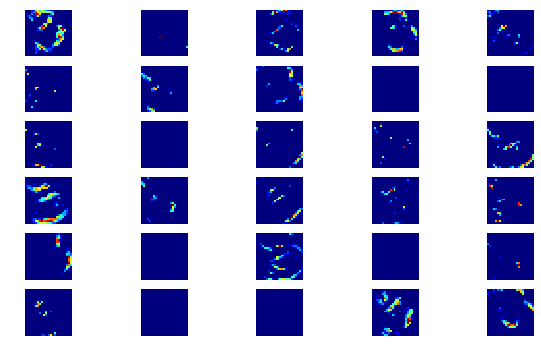

In [24]:
# Plot the outputs of the first Conv2D Layer
plt.figure(figsize=(10,6))
for i in range(30): # plot all 30 filters
  plt.subplot(6, 5, i+1) # Grid
  plt.imshow(visual_layer1[0, :, :, i], cmap=plt.get_cmap('jet')) # highlight the gradients
  plt.axis('off')

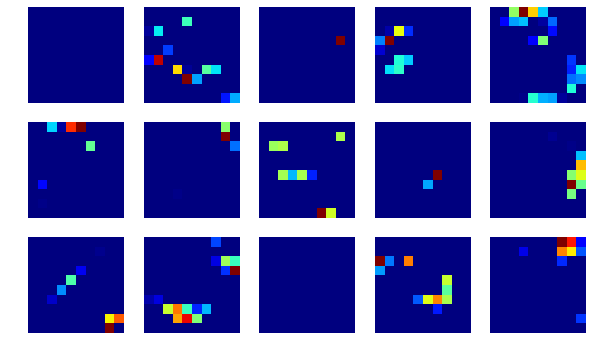

In [25]:
# Plot the outputs of the second Conv2D Layer
plt.figure(figsize=(10,6))
for i in range(15): # plot all 15 filters
  plt.subplot(3, 5, i+1) # Grid
  plt.imshow(visual_layer2[0, :, :, i], cmap=plt.get_cmap('jet')) # highlight the gradients
  plt.axis('off')